In [10]:
from warnings import simplefilter
simplefilter(action='ignore')

In [1]:
#importing all packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib

In [2]:
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
Customer Id           7160 non-null object
YearOfObservation     7160 non-null int64
Insured_Period        7160 non-null float64
Residential           7160 non-null int64
Building_Painted      7160 non-null object
Building_Fenced       7160 non-null object
Garden                7153 non-null object
Settlement            7160 non-null object
Building Dimension    7054 non-null float64
Building_Type         7160 non-null int64
Date_of_Occupancy     6652 non-null float64
NumberOfWindows       7160 non-null object
Geo_Code              7058 non-null object
Claim                 7160 non-null int64
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [3]:
data = pd.concat([train,test],ignore_index =True)

C:\Users\user\Anaconda3\Desktop\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [4]:
train.shape,test.shape

((7160, 14), (3069, 13))

In [5]:
data.shape

(10229, 14)

In [6]:
data.isnull().sum()

Building Dimension     119
Building_Fenced          0
Building_Painted         0
Building_Type            0
Claim                 3069
Customer Id              0
Date_of_Occupancy     1236
Garden                  11
Geo_Code               115
Insured_Period           0
NumberOfWindows          0
Residential              0
Settlement               0
YearOfObservation        0
dtype: int64

In [7]:
#filling the missing values.using mode cause they are converting string to string
data['Garden']=data['Garden'].fillna(data['Garden'].mode()[0])
data['Geo_Code']=data['Geo_Code'].fillna(data['Geo_Code'].mode()[0])
data['Building Dimension']=data['Building Dimension'].fillna(data['Building Dimension'].mode()[0])
data['Building_Type']=data['Building_Type'].fillna(data['Building_Type'].mode()[0])
data['Date_of_Occupancy']=data['Date_of_Occupancy'].fillna(data['Date_of_Occupancy'].mode()[0])

In [8]:
data.isnull().sum()

Building Dimension       0
Building_Fenced          0
Building_Painted         0
Building_Type            0
Claim                 3069
Customer Id              0
Date_of_Occupancy        0
Garden                   0
Geo_Code                 0
Insured_Period           0
NumberOfWindows          0
Residential              0
Settlement               0
YearOfObservation        0
dtype: int64

                    Building Dimension  Building_Type     Claim  \
Building Dimension            1.000000       0.024927  0.295423   
Building_Type                 0.024927       1.000000  0.112168   
Claim                         0.295423       0.112168  1.000000   
Date_of_Occupancy             0.193828      -0.142388  0.019122   
Insured_Period                0.009163      -0.029292  0.088715   
Residential                   0.029305       0.289646  0.063509   
YearOfObservation             0.014617       0.000373 -0.016367   

                    Date_of_Occupancy  Insured_Period  Residential  \
Building Dimension           0.193828        0.009163     0.029305   
Building_Type               -0.142388       -0.029292     0.289646   
Claim                        0.019122        0.088715     0.063509   
Date_of_Occupancy            1.000000        0.000108    -0.040067   
Insured_Period               0.000108        1.000000    -0.056036   
Residential                 -0.040067      

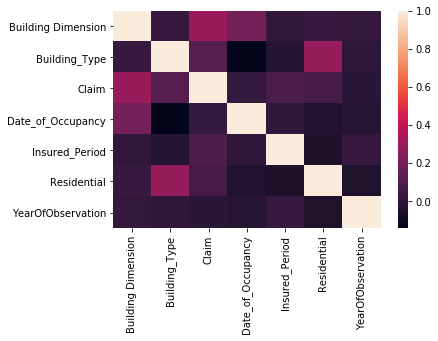

In [9]:
#To find relation between each of them.
corr=data.corr();
print(corr)
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)
plt.show()
    

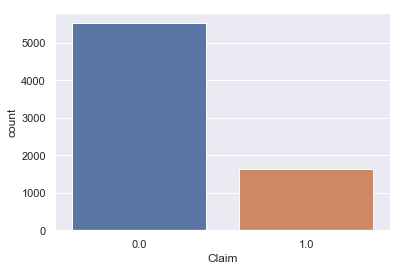

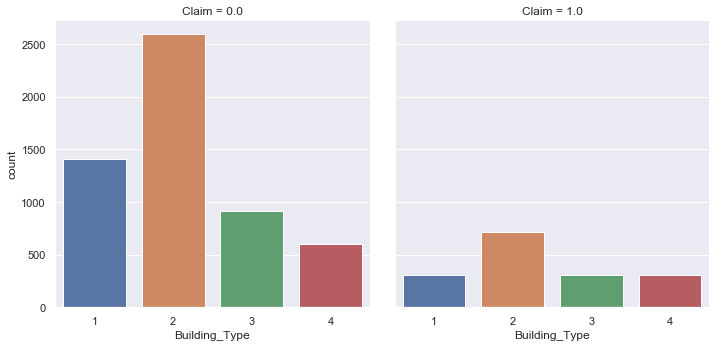

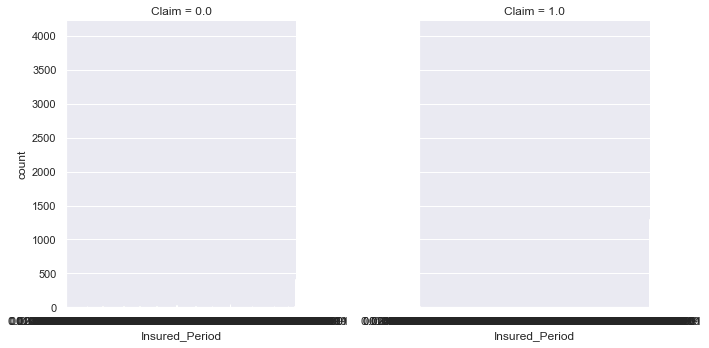

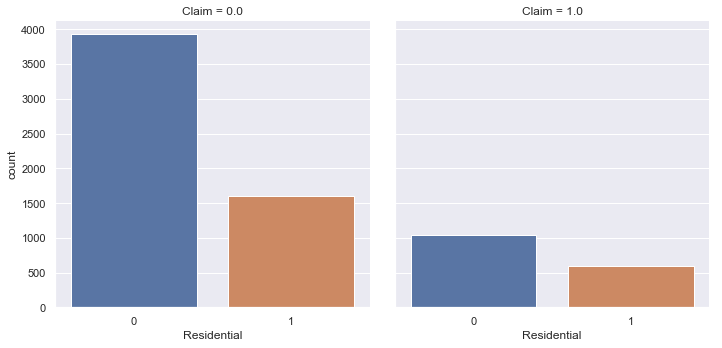

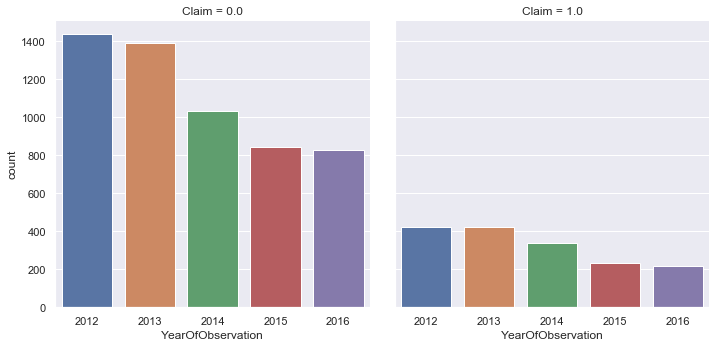

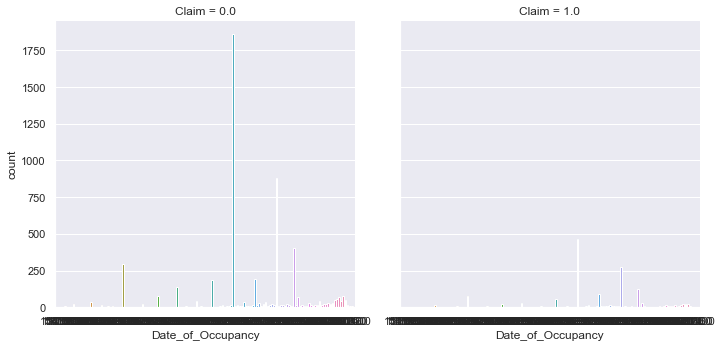

In [10]:
sns.set(style='darkgrid')
sns.countplot(x='Claim',data=data)
sns.catplot(x='Building_Type',col='Claim',data=data,kind='count')
sns.catplot(x='Insured_Period',col='Claim',data=data,kind='count')
sns.catplot(x='Residential',col='Claim',data=data,kind='count')
sns.catplot(x='YearOfObservation',col='Claim',data=data,kind='count')
#sns.catplot(x='Residential',col='Claim',data=data,kind='count')
sns.catplot(x='Date_of_Occupancy',col='Claim',data=data,kind='count')
plt.show()

In [11]:
data.describe()

,Building Dimension,Building_Type,Claim,Date_of_Occupancy,Insured_Period,Residential,YearOfObservation
count,10229.000000,10229.000000,7160.000000,10229.000000,10229.000000,10229.000000,10229.000000
mean,1801.654707,2.238049,0.228212,1964.450093,0.913672,0.281064,2013.646789
std,2263.968325,0.961589,0.419709,31.499523,0.233806,0.449540,1.380660
min,1.000000,1.000000,0.000000,1545.000000,0.000000,0.000000,2012.000000
25%,500.000000,2.000000,0.000000,1960.000000,1.000000,0.000000,2012.000000
50%,1000.000000,2.000000,0.000000,1960.000000,1.000000,0.000000,2013.000000
75%,2167.000000,3.000000,0.000000,1980.000000,1.000000,1.000000,2015.000000
max,30745.000000,4.000000,1.000000,2016.000000,1.000000,1.000000,2016.000000


In [12]:
train_df = data[:7160]
test_df = data[7160:]

In [13]:
#using LinearRegression Algo1
X=train[['YearOfObservation','Insured_Period','Residential',
        'Building Dimension','Building_Type','Date_of_Occupancy']]
y=train['Claim']

In [14]:
#splitting and traing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
from sklearn.linear_model import LogisticRegression

#Instantiate
lr = LogisticRegression()

#fit to X_train and y_train
lr.fit(X_train,y_train)

#check score of training
print('Score of train:',lr.score(X_train,y_train))

#check score of test set
print('Score of test',lr.score(X_test,y_test))

C:\Users\user\Anaconda3\Desktop\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
pre = lr.predict(test_df)

In [ ]:
dataframe = pd.DataFrame({'':'','':pre})

In [ ]:
dataframe.to_csv('',index=False)

In [14]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
YearOfObservation,-0.010231
Insured_Period,0.179252
Residential,0.015944
Building Dimension,0.000051
Building_Type,0.045158
Date_of_Occupancy,-0.000154


In [15]:
predictions=lm.predict(X_test)

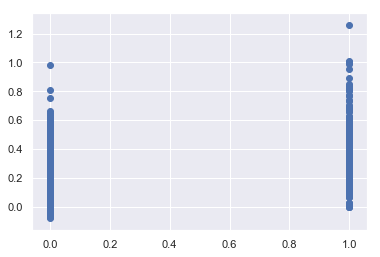

In [16]:
plt.scatter(y_test,predictions)

C:\Users\user\Anaconda3\Desktop\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


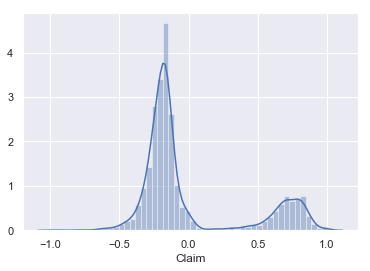

In [17]:
#residual histogram
sns.distplot((y_test-predictions), bins=50);

In [18]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 0.3149609765171314
MSE: 0.15516631678255724
RMSE: 0.39391155959498986


In [19]:
#Importing Polynomial Feature class from SKLearn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4) #Degree depicts the Curves
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)

PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)

In [20]:
regressor_2 = LinearRegression()
regressor_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
regressor_2.score(X_poly,y)

0.14409624352619776

In [22]:
# Predicting a new result with Polynomial Regression
Poly_pred = regressor_2.predict(poly_reg.fit_transform(X))

In [23]:
print('regression intercept= ', regressor_2.intercept_)

regression intercept=  -3867.858173759934


In [24]:
data['yhat_poly'] = Poly_pred

data

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim,yhat_poly
0,H14663,2013,1.000000,0,N,V,V,U,290.0,1,1960.0,.,1053,0,0.096227
1,H2037,2015,1.000000,0,V,N,O,R,490.0,1,1850.0,4,1053,0,0.176489
2,H3802,2014,1.000000,0,N,V,V,U,595.0,1,1960.0,.,1053,0,0.116257
3,H3834,2013,1.000000,0,V,V,V,U,2840.0,1,1960.0,.,1053,0,0.309004
4,H5053,2014,1.000000,0,V,N,O,R,680.0,1,1800.0,3,1053,0,0.233186
5,H4977,2012,1.000000,0,V,N,O,R,535.0,1,1980.0,3,1143,0,0.111422
6,H7390,2012,1.000000,0,N,V,V,U,2830.0,1,1988.0,.,1143,0,0.289711
7,H14488,2015,1.000000,0,N,V,V,U,4952.0,1,1988.0,.,1160,0,0.356226
8,H19355,2014,1.000000,0,V,N,O,R,2735.0,1,2013.0,3,1173,1,0.233363
9,H18601,2015,1.000000,0,V,N,O,R,520.0,1,2011.0,2,1224,0,0.061919


In [25]:
#using Naive Bayes for the training Algo2
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [26]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [27]:
# evaluating performance : Accuracy, Precision, Recall
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))

Accuracy:  0.7844506517690876
Precision:  0.5798816568047337
Recall:  0.2


In [28]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
roc_auc= auc (fpr, tpr)
print  ("ROC AUC", roc_auc)

ROC AUC 0.5785886610373944


In [29]:
# Plot confusion Matrix
def conftable(test,pred, imagename):
    confmatrix= metrics.confusion_matrix(y_test, y_pred)
    plt.matshow(confmatrix)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('GroundTruth')
    plt.xlabel('Predicted')
    plt.savefig(imagename)
    
    plt.show()
    print(confmatrix)

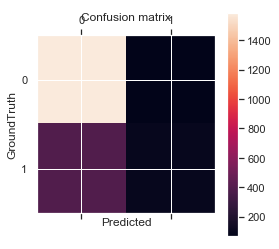

[[1587   71]
 [ 392   98]]


In [30]:
conftable(y_test,y_pred,"conf")

In [31]:
# Ground Truth
pd.Series(y_test).value_counts()

0    1658
1     490
Name: Claim, dtype: int64

In [32]:
# Fitting Logistic Regression to the Training set Algo3
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\user\Anaconda3\Desktop\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

Accuracy:  0.7881750465549349
Precision:  0.7011494252873564
Recall:  0.12448979591836734
ROC AUC 0.5544041259447084


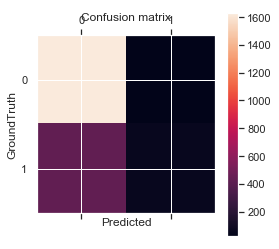

[[1632   26]
 [ 429   61]]


In [34]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
roc_auc= auc (fpr, tpr)
print  ("ROC AUC", roc_auc)
conftable(y_test,y_pred,"conf")

In [35]:
#using Random forest Algo5
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [36]:
#predicting the test results
y_pred = classifier.predict(X_test)

Accuracy:  0.7476722532588455
Precision:  0.4097222222222222
Recall:  0.24081632653061225
ROC AUC 0.5691415770168139


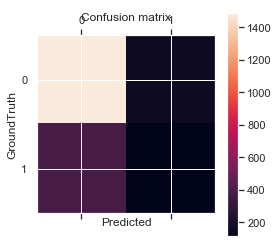

[[1488  170]
 [ 372  118]]


In [37]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
roc_auc= auc (fpr, tpr)
print  ("ROC AUC", roc_auc)
conftable(y_test,y_pred,"conf")

In [38]:
import joblib
with open('model.joblib','wb') as f:
    joblib.dump(LinearRegression,f)

In [47]:
prediction=lm.predict(X_test)

In [48]:
prediction

array([0.21958333, 0.37337633, 0.17209786, ..., 0.15370566, 0.18514122,
       0.1985661 ])

In [49]:
data=pd.read_csv('test.csv')

In [54]:
df.to_csv('submit.csv',in

NameError: name 'df' is not defined